Folders inside dataset: ['metal', 'glass', 'biological', 'paper', 'battery', 'trash', 'cardboard', 'shoes', 'clothes', 'plastic']
Classes (Pollution categories): ['metal', 'glass', 'biological', 'paper', 'battery', 'trash', 'cardboard', 'shoes', 'clothes', 'plastic']

Image Counts per Class:
             Image Count
metal              1016
glass              3054
biological          997
paper              1678
battery             944
trash               938
cardboard          1824
shoes              1977
clothes            5326
plastic            1976

Dataset Statistics:
       Image Count
count    10.000000
mean   1973.000000
std    1354.782147
min     938.000000
25%    1001.750000
50%    1751.000000
75%    1976.750000
max    5326.000000

Missing Values Check:
Image Count    0
dtype: int64


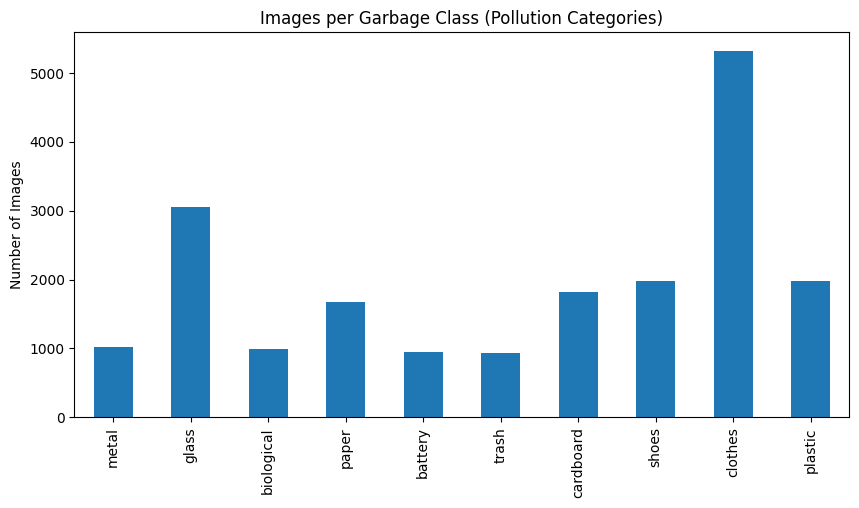

Found 13835 images belonging to 10 classes.
Found 5927 images belonging to 10 classes.

✅ Preprocessing Done
Training Samples: 13835
Validation Samples: 5927
Classes: {'battery': 0, 'biological': 1, 'cardboard': 2, 'clothes': 3, 'glass': 4, 'metal': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'trash': 9}


In [7]:
# =============================
# Week 1 Project - Environmental Monitoring & Pollution Control
# Dataset: Garbage Classification (Environmental Pollution Monitoring)
# =============================

# 1. Import necessary libraries
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Load the dataset
root_dir = "/kaggle/input/garbage-classification-v2/garbage-dataset"

# Check dataset root
print("Folders inside dataset:", os.listdir(root_dir))

# 3. Explore the dataset
classes = [folder for folder in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, folder))]
print("Classes (Pollution categories):", classes)

# Count images in each class
counts = {c: len(glob(os.path.join(root_dir, c, "*.jpg"))) for c in classes}
df_counts = pd.DataFrame.from_dict(counts, orient="index", columns=["Image Count"])
print("\nImage Counts per Class:\n", df_counts)

# Dataset statistics
print("\nDataset Statistics:")
print(df_counts.describe())

# Check for missing values
print("\nMissing Values Check:")
print(df_counts.isnull().sum())

# Plot class distribution
df_counts.plot(kind="bar", figsize=(10,5), title="Images per Garbage Class (Pollution Categories)", legend=False)
plt.ylabel("Number of Images")
plt.show()

# 4. Preprocessing (Rescaling + Splitting into train/val)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(
    root_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    root_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("\n✅ Preprocessing Done")
print("Training Samples:", train_generator.samples)
print("Validation Samples:", val_generator.samples)
print("Classes:", train_generator.class_indices)
